# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 0
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
#         print(city_weather)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 1 | sigli
Processing Record 1 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 1 | bafia
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | bay roberts
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | victoria
Processing Record 11 of Set 1 | cabanas
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | atambua
Processing Record 14 of Set 1 | cidreira
Processing Record 15 of Set 1 | geraldton
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | inverness
Processing Record 20 of Set 1 | necochea
Processing Record 21 of Set 1 | albany
Processing Record 2

Processing Record 34 of Set 4 | sarakhs
Processing Record 35 of Set 4 | quetigny
Processing Record 36 of Set 4 | batemans bay
Processing Record 37 of Set 4 | miraflores
Processing Record 38 of Set 4 | dinsor
City not found. Skipping...
Processing Record 39 of Set 4 | katsuura
Processing Record 40 of Set 4 | koeru
Processing Record 41 of Set 4 | hamilton
Processing Record 42 of Set 4 | grand-santi
Processing Record 43 of Set 4 | korla
Processing Record 44 of Set 4 | staryy nadym
Processing Record 45 of Set 4 | dhidhdhoo
Processing Record 46 of Set 4 | tombouctou
Processing Record 47 of Set 4 | borama
City not found. Skipping...
Processing Record 48 of Set 4 | bud
Processing Record 49 of Set 4 | arman
Processing Record 0 of Set 5 | nuuk
Processing Record 1 of Set 5 | carnarvon
Processing Record 2 of Set 5 | kandrian
Processing Record 3 of Set 5 | belaya gora
Processing Record 4 of Set 5 | labutta
City not found. Skipping...
Processing Record 5 of Set 5 | plainview
Processing Record 6 of 

Processing Record 21 of Set 8 | eskasem
City not found. Skipping...
Processing Record 22 of Set 8 | berlevag
Processing Record 23 of Set 8 | paveh
Processing Record 24 of Set 8 | constitucion
Processing Record 25 of Set 8 | sioux lookout
Processing Record 26 of Set 8 | broome
Processing Record 27 of Set 8 | pomabamba
Processing Record 28 of Set 8 | birecik
Processing Record 29 of Set 8 | vardo
Processing Record 30 of Set 8 | mega
Processing Record 31 of Set 8 | jujuy
City not found. Skipping...
Processing Record 32 of Set 8 | port blair
Processing Record 33 of Set 8 | waingapu
Processing Record 34 of Set 8 | catuday
Processing Record 35 of Set 8 | lata
Processing Record 36 of Set 8 | balakovo
Processing Record 37 of Set 8 | tazmalt
Processing Record 38 of Set 8 | nongpoh
Processing Record 39 of Set 8 | sumenep
Processing Record 40 of Set 8 | luangwa
Processing Record 41 of Set 8 | luderitz
Processing Record 42 of Set 8 | xudat
Processing Record 43 of Set 8 | paamiut
Processing Record 4

Processing Record 7 of Set 12 | elizabeth city
Processing Record 8 of Set 12 | cumaribo
City not found. Skipping...
Processing Record 9 of Set 12 | challans
Processing Record 10 of Set 12 | dali
Processing Record 11 of Set 12 | manacapuru
Processing Record 12 of Set 12 | chaochou
City not found. Skipping...
Processing Record 13 of Set 12 | sao felix do xingu
Processing Record 14 of Set 12 | kochi
Processing Record 15 of Set 12 | jijiga
Processing Record 16 of Set 12 | viksoyri
City not found. Skipping...
Processing Record 17 of Set 12 | juba
Processing Record 18 of Set 12 | nevsehir
Processing Record 19 of Set 12 | richards bay
Processing Record 20 of Set 12 | camara de lobos
Processing Record 21 of Set 12 | yashkul
Processing Record 22 of Set 12 | george
Processing Record 23 of Set 12 | santa maria do suacui
Processing Record 24 of Set 12 | alcudia
Processing Record 25 of Set 12 | annau
Processing Record 26 of Set 12 | zhezkazgan
Processing Record 27 of Set 12 | vila velha
Processing 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sigli,5.3848,95.9609,77.79,82,92,3.58,ID,1675878339
1,bafia,4.7500,11.2333,83.91,17,47,3.62,CM,1675878339
2,cape town,-33.9258,18.4232,76.10,63,0,17.27,ZA,1675878280
3,ribeira grande,38.5167,-28.7000,58.77,54,40,8.05,PT,1675878340
4,atuona,-9.8000,-139.0333,79.12,80,18,18.97,PF,1675878340


In [8]:


# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sigli,5.3848,95.9609,77.79,82,92,3.58,ID,1675878339
1,bafia,4.7500,11.2333,83.91,17,47,3.62,CM,1675878339
2,cape town,-33.9258,18.4232,76.10,63,0,17.27,ZA,1675878280
3,ribeira grande,38.5167,-28.7000,58.77,54,40,8.05,PT,1675878340
4,atuona,-9.8000,-139.0333,79.12,80,18,18.97,PF,1675878340


In [10]:
import datetime as dt

date_stamp = pd.to_datetime(city_data_df["Date"], unit="s").dt.date[0].strftime("%Y-%m-%d")

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

/var/folders/87/dqr5jfd95_g_ttf8db89jb9h0000gn/T/ipykernel_4314/2227060080.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


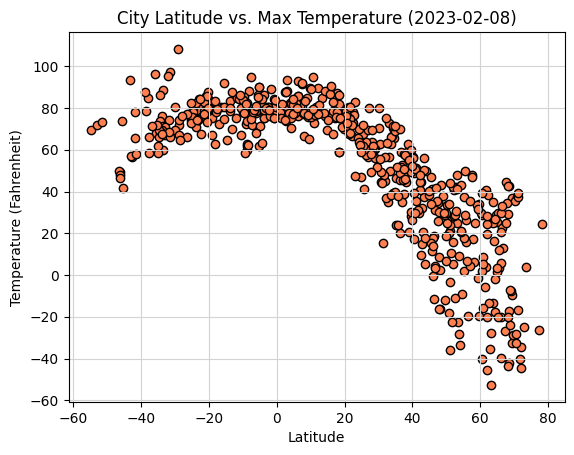

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", facecolors="coral")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({date_stamp})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Fahrenheit)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

/var/folders/87/dqr5jfd95_g_ttf8db89jb9h0000gn/T/ipykernel_4314/3310789282.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


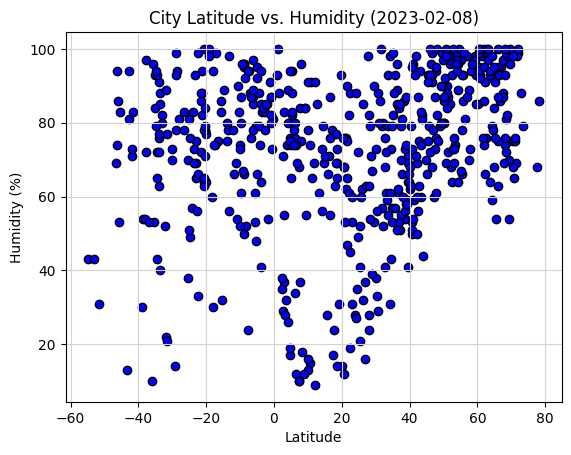

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", facecolors="blue")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date_stamp})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

/var/folders/87/dqr5jfd95_g_ttf8db89jb9h0000gn/T/ipykernel_4314/212476193.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


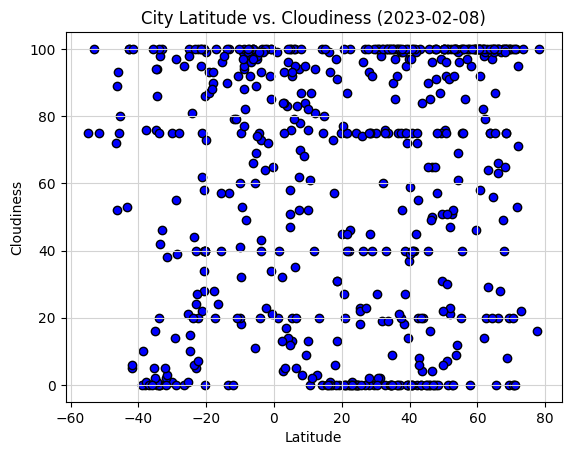

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", facecolors="blue")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date_stamp})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

/var/folders/87/dqr5jfd95_g_ttf8db89jb9h0000gn/T/ipykernel_4314/4014311386.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


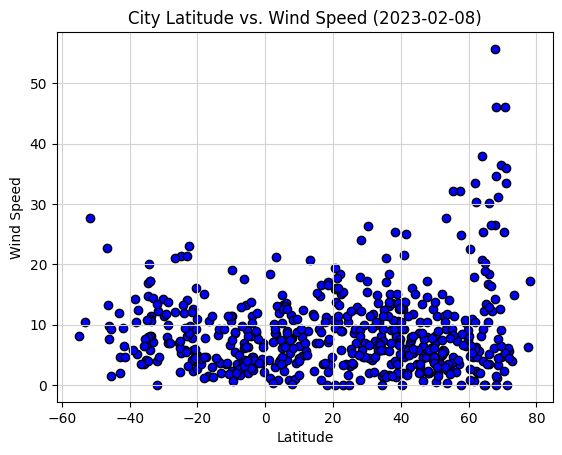

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", facecolors="blue")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date_stamp})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df[pd.to_numeric(city_data_df["Lat"]) > 0]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sigli,5.3848,95.9609,77.79,82,92,3.58,ID,1675878339
1,bafia,4.7500,11.2333,83.91,17,47,3.62,CM,1675878339
3,ribeira grande,38.5167,-28.7000,58.77,54,40,8.05,PT,1675878340
5,bay roberts,47.5999,-53.2648,35.15,87,100,8.01,CA,1675878341
9,victoria,22.2855,114.1577,66.38,88,100,15.01,HK,1675878127


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df[pd.to_numeric(city_data_df["Lat"]) < 0]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,cape town,-33.9258,18.4232,76.10,63,0,17.27,ZA,1675878280
4,atuona,-9.8000,-139.0333,79.12,80,18,18.97,PF,1675878340
6,vaini,-21.2000,-175.2000,77.16,94,75,5.75,TO,1675878341
7,mataura,-46.1927,168.8643,49.48,94,89,7.56,NZ,1675878341
8,busselton,-33.6500,115.3333,59.72,88,0,11.34,AU,1675878342


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7003596847704741


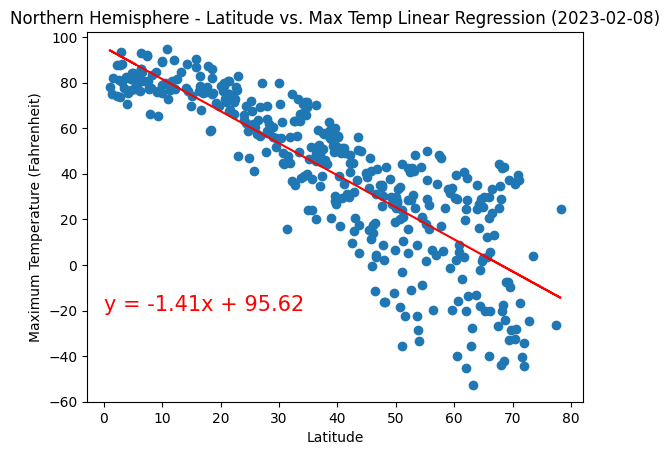

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (Fahrenheit)')
plt.title(f'Northern Hemisphere - Latitude vs. Max Temp Linear Regression ({date_stamp})')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.24286138715299388


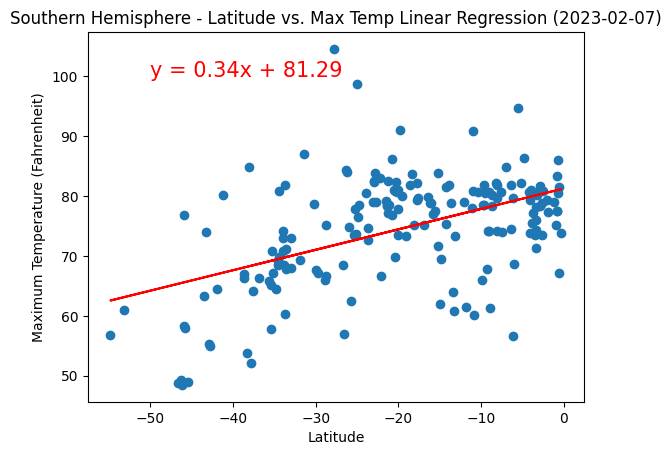

In [109]:
# Linear regression on Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,100),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (Fahrenheit)')
plt.title(f'Southern Hemisphere - Latitude vs. Max Temp Linear Regression ({date_stamp})')


# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [18]:
print("It can be observed that the Northern Hemisphere has a strong relationshp between Maximum Temperature and Latitude with an r squared value of .70. This relationship persists in the southern hemisphere, but is not as strong, with an r squared value of only .24. This makes sense, as the closer one gets to either the Arctic or the Antarctic the colder it generally gets. But there seems to be much more variability in the Southern Hemisphere leading to a weaker relationship between these factors.")

It can be observed that the Northern Hemisphere has a strong relationshp between Maximum Temperature and Latitude with an r squared value of .70. This relationship persists in the southern hemisphere, but is not as strong, with an r squared value of only .24. This makes sense, as the closer one gets to either the Arctic or the Antarctic the colder it generally gets. But there seems to be much more variability in the Southern Hemisphere leading to a weaker relationship between these factors.


### Humidity vs. Latitude Linear Regression Plot

R squared: 0.2242801798162098


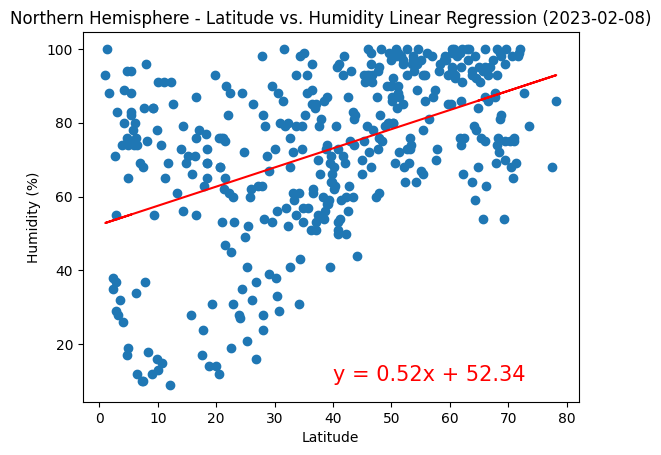

In [19]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere - Latitude vs. Humidity Linear Regression ({date_stamp})')


# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.055011493274062295


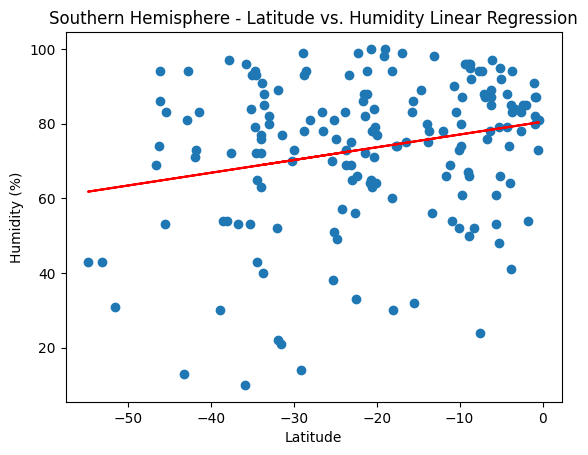

In [20]:
# Southern Hemisphere
x_values = southern_df["Lat"].astype("float")
y_values = southern_df["Humidity"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Latitude vs. Humidity Linear Regression')


# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [25]:
print("We can see that Humidity and Latitude have a weak relationship in the Nothern Hemisphere with an r squared value of .22 and a non-existent relationship in the Southern Hemisphere with an r squared value of .06")

We can see that Humidity and Latitude have a weak relationship in the Nothern Hemisphere with an r squared value of .22 and a non-existent relationship in the Southern Hemisphere with an r squared value of .06


### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.03760083371895975


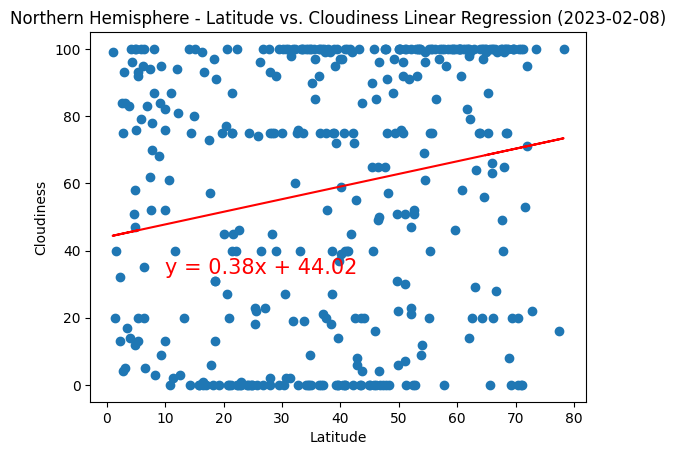

In [21]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,33),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Hemisphere - Latitude vs. Cloudiness Linear Regression ({date_stamp})')


# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.06913848053203026


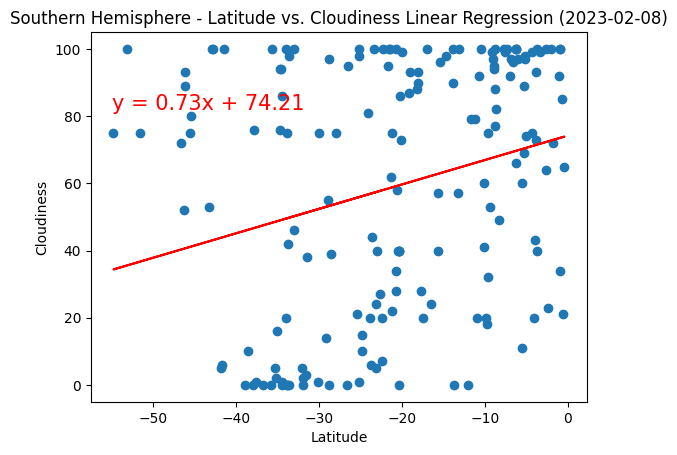

In [22]:
# Southern Hemisphere
# Southern Hemisphere
x_values = southern_df["Lat"].astype("float")
y_values = southern_df["Cloudiness"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,82),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Hemisphere - Latitude vs. Cloudiness Linear Regression ({date_stamp})')


# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [26]:
print("Here we can see the lack of a relationship between Cloudiness and Latitude with r squared values of .04 in the Northern Hemisphere and .07 in the Southern Hemisphere.")

Here we can see the lack of a relationship between Cloudiness and Latitude with r squared values of .04 in the Northern Hemisphere and .07 in the Southern Hemisphere.


### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.03098909170112485


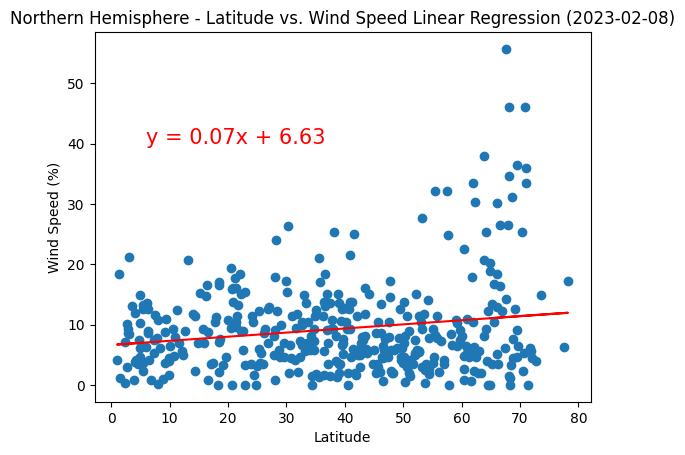

In [23]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,40),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.title(f'Northern Hemisphere - Latitude vs. Wind Speed Linear Regression ({date_stamp})')


# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.08926065083234726


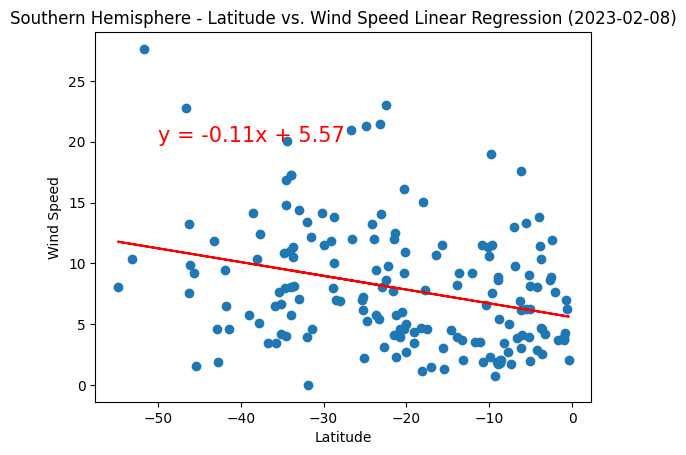

In [24]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Southern Hemisphere - Latitude vs. Wind Speed Linear Regression ({date_stamp})')


# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [27]:
print("Finally, here we can see the lack of a relationship between Wind Speed and Latitude with r squared values of .03 in the Northern Hemisphere and .09 in the Southern Hemisphere.")

Finally, here we can see the lack of a relationship between Wind Speed and Latitude with r squared values of .03 in the Northern Hemisphere and .09 in the Southern Hemisphere.
